# Import Libraries

In [23]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import boxcox, shapiro, kstest

In [4]:
dataframe = pd.read_csv('./assets/insurance.csv')
dataframe.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
print(" ROWS & COLUMNS ".center(70,'-'))
print("Number of rows: {}".format(dataframe.shape[0]))
print("Column Names: "+', '.join('{}'.format(col) for col in dataframe.columns.tolist()))
print(" COLUMN TYPES ".center(70,'-'))
print(dataframe.dtypes)
print(" NULLS ".center(70,'-'))
print(dataframe.isnull().sum())
print(" DUPLICATES ".center(70,'-'))
print(dataframe.duplicated().sum())

--------------------------- ROWS & COLUMNS ---------------------------
Number of rows: 1338
Column Names: age, sex, bmi, children, smoker, region, charges
---------------------------- COLUMN TYPES ----------------------------
age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object
------------------------------- NULLS --------------------------------
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
----------------------------- DUPLICATES -----------------------------
1


<Figure size 1200x400 with 0 Axes>

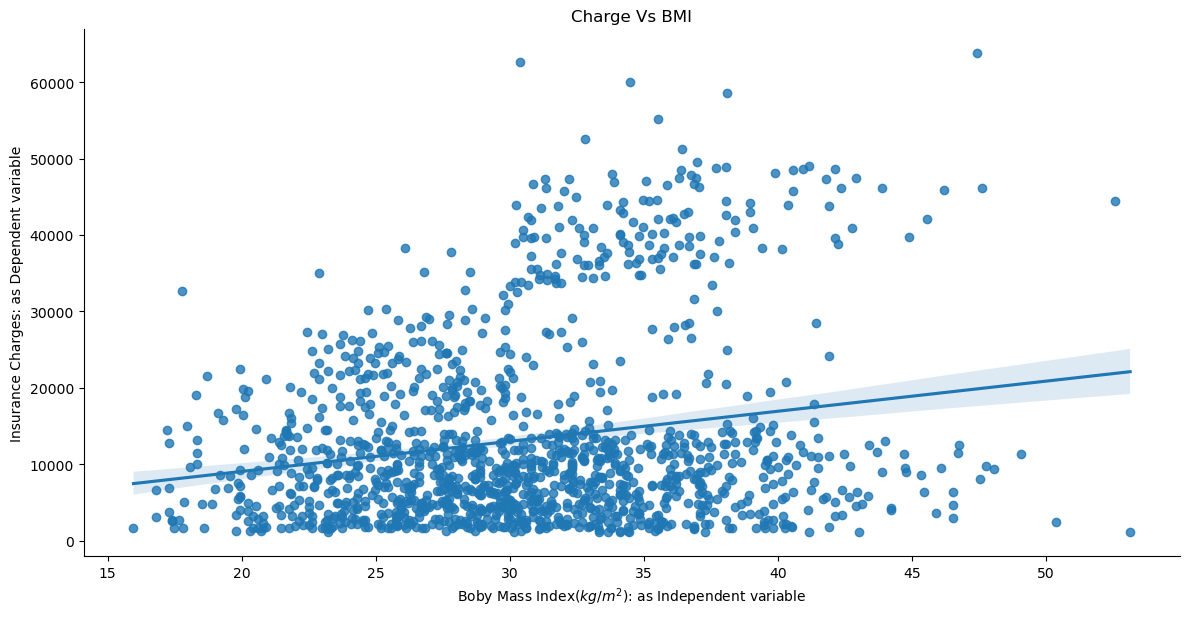

In [10]:
f = plt.figure(figsize=(12,4))

sns.lmplot(x='bmi', y='charges', data=dataframe, aspect=2, height=6)

plt.xlabel('Boby Mass Index$(kg/m^2)$: as Independent variable')
plt.ylabel('Insurance Charges: as Dependent variable')
plt.title('Charge Vs BMI');

In [11]:
dataframe.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [12]:
dataframe.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


OBS: Charges is the only variable where mean != median

In [13]:
dataframe[dataframe.isnull()].dropna().count()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

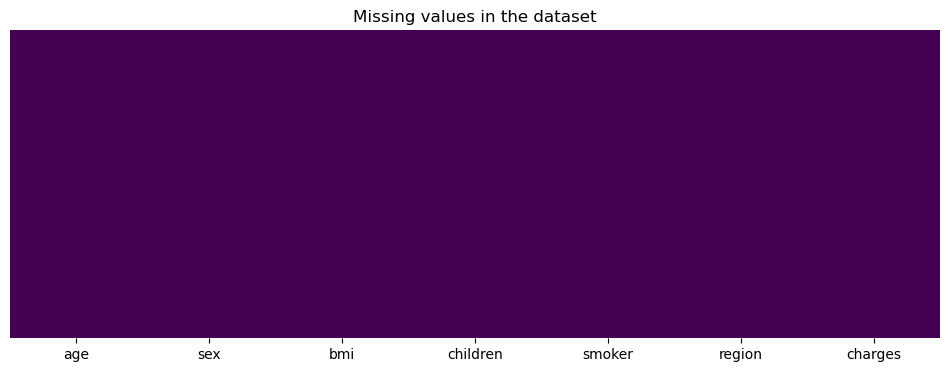

In [14]:
plt.figure(figsize=(12,4))
sns.heatmap(dataframe.isnull(),cbar=False,cmap='viridis',yticklabels=False)
plt.title('Missing values in the dataset');

## Correlation plot

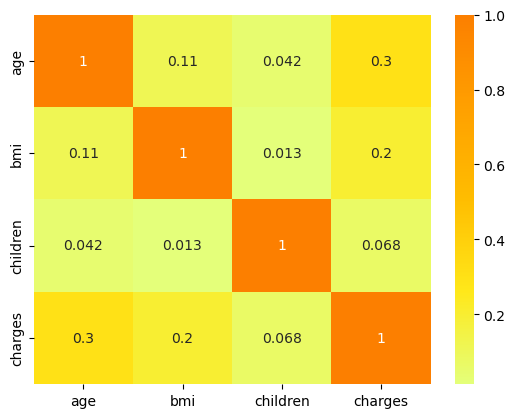

In [16]:
corr = dataframe.corr(numeric_only=True)
sns.heatmap(corr, cmap = 'Wistia', annot= True);

OBS: No strong correlation between variables

In [19]:
dataframe.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


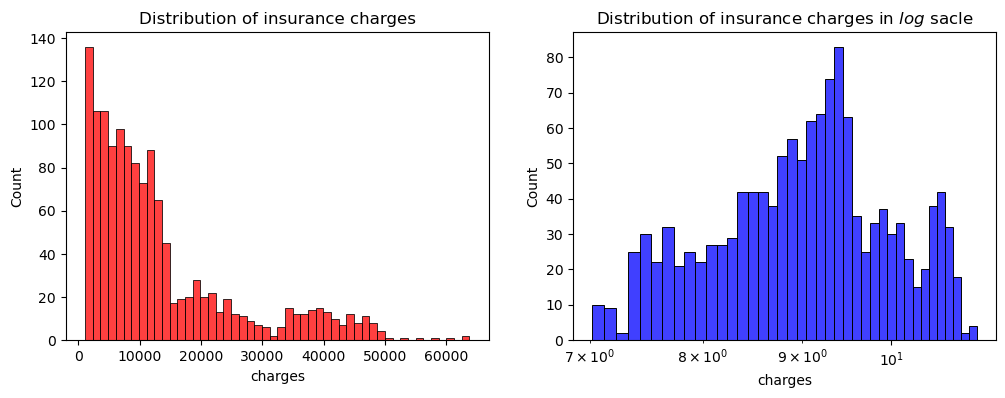

In [84]:
f= plt.figure(figsize=(12,4))

ax=f.add_subplot(121)
sns.histplot(dataframe['charges'],bins=50,color='r',ax=ax)
ax.set_title('Distribution of insurance charges')

ax=f.add_subplot(122)
sns.histplot(np.log(dataframe['charges']),bins=40,color='b',ax=ax)
ax.set_title('Distribution of insurance charges in $log$ sacle')
ax.set_xscale('log');

In [87]:
from distfit import distfit

print(shapiro(np.log(dataframe["charges"])))
print(kstest(np.log(dataframe["charges"]), 'norm'))
dfit2 = distfit(n_boots=100, distr='norm')
dfit2.fit_transform(np.log(dataframe["charges"]))
dfit2.summary

[distfit] >INFO> fit
[distfit] >INFO> transform


ShapiroResult(statistic=0.9831625819206238, pvalue=2.286311071020286e-11)
KstestResult(statistic=0.9999999999989123, pvalue=0.0, statistic_location=7.02275569117477, statistic_sign=-1)


[distfit] >INFO> [norm] [0.10 sec] [RSS: 0.107] [loc=9.099 scale=0.919]
[distfit] >INFO> Compute confidence intervals [parametric]


,name,score,loc,scale,arg,params,model,bootstrap_score,bootstrap_pass,color
0,norm,0.107,9.098659,0.919183,(),"(9.098658729424766, 0.9191834287056958)",<scipy.stats._distn_infrastructure.rv_continuo...,0.0,False,#e41a1c


Text(0.5, 1.0, 'Violin plot of Charges vs region')

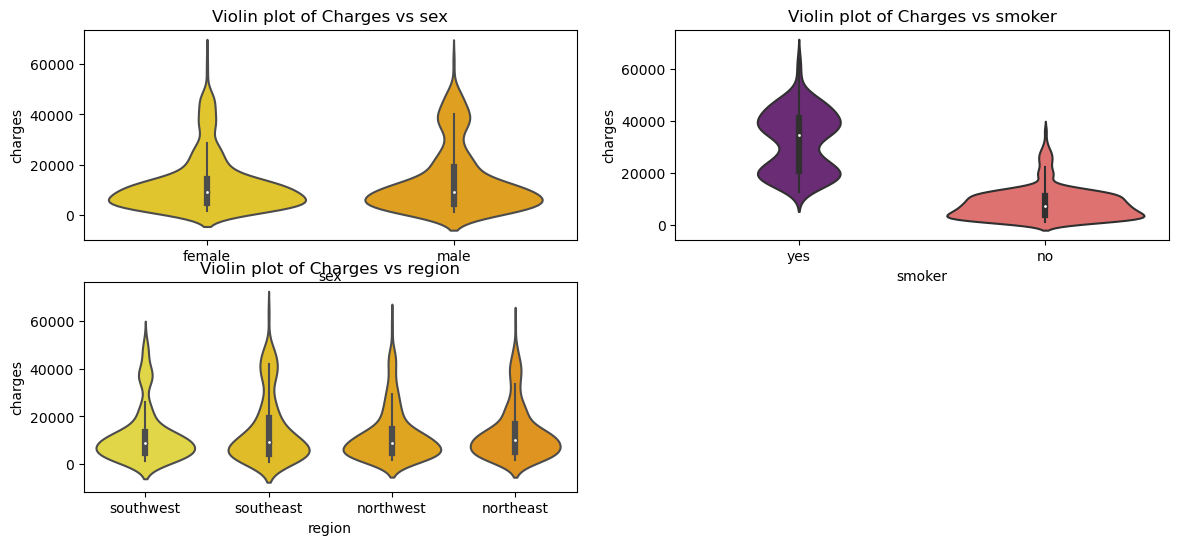

In [88]:
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(221)
sns.violinplot(x='sex', y='charges',data=dataframe,palette='Wistia',ax=ax)
ax.set_title('Violin plot of Charges vs sex')

ax = f.add_subplot(222)
sns.violinplot(x='smoker', y='charges',data=dataframe,palette='magma',ax=ax)
ax.set_title('Violin plot of Charges vs smoker')

ax = f.add_subplot(223)
sns.violinplot(x='region', y='charges',data=dataframe,palette='Wistia',ax=ax)
ax.set_title('Violin plot of Charges vs region')

Text(0.5, 1.0, 'Box plot of Charges vs region')

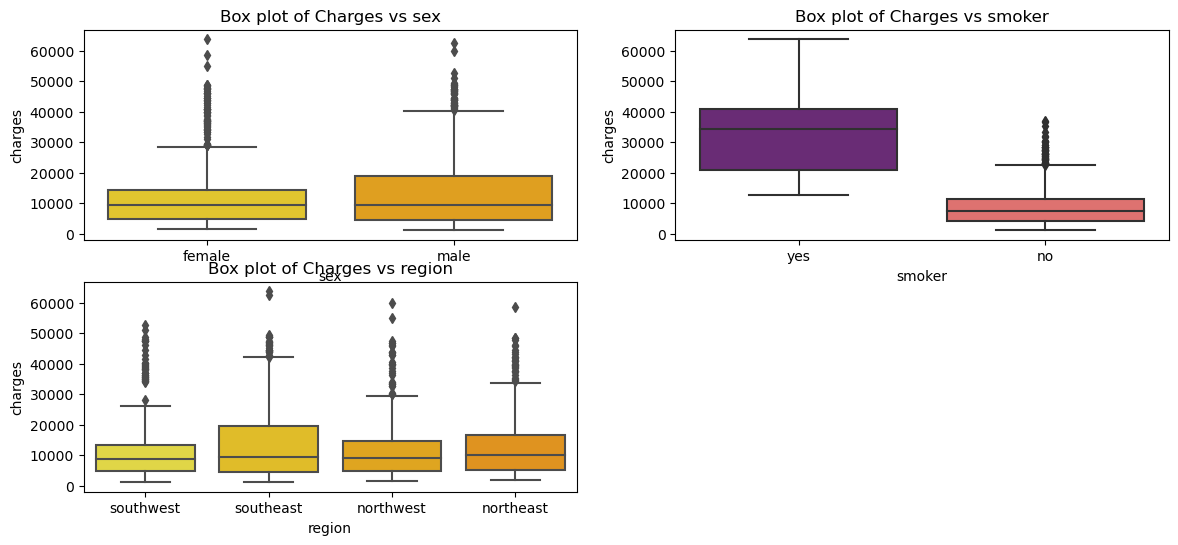

In [89]:
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(221)
sns.boxplot(x='sex', y='charges',data=dataframe,palette='Wistia',ax=ax)
ax.set_title('Box plot of Charges vs sex')

ax = f.add_subplot(222)
sns.boxplot(x='smoker', y='charges',data=dataframe,palette='magma',ax=ax)
ax.set_title('Box plot of Charges vs smoker')

ax = f.add_subplot(223)
sns.boxplot(x='region', y='charges',data=dataframe,palette='Wistia',ax=ax)
ax.set_title('Box plot of Charges vs region')

Text(0.5, 1.0, 'Scatter plot of Charges vs bmi')

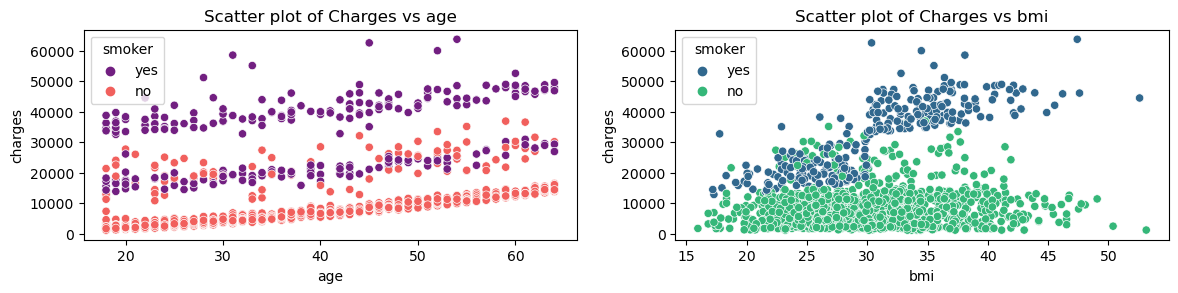

In [90]:
f = plt.figure(figsize=(14,6))

ax = f.add_subplot(221)
sns.scatterplot(x='age',y='charges',data=dataframe,palette='magma',hue='smoker')
ax.set_title('Scatter plot of Charges vs age')

ax = f.add_subplot(222)
sns.scatterplot(x='bmi',y='charges',data=dataframe,palette='viridis',hue='smoker')
ax.set_title('Scatter plot of Charges vs bmi')

## Categorical variables as dummies

In [91]:
categorical_columns = ['sex', 'children', 'smoker', 'region']
dataframe_with_dummies = pd.get_dummies(
    data = dataframe,
    prefix = 'dummy',
    prefix_sep='_',
    columns = categorical_columns,
    drop_first =True,
    dtype='int8'
)
print(dataframe_with_dummies.columns)

Index(['age', 'bmi', 'charges', 'dummy_male', 'dummy_1', 'dummy_2', 'dummy_3',
       'dummy_4', 'dummy_5', 'dummy_yes', 'dummy_northwest', 'dummy_southeast',
       'dummy_southwest'],
      dtype='object')


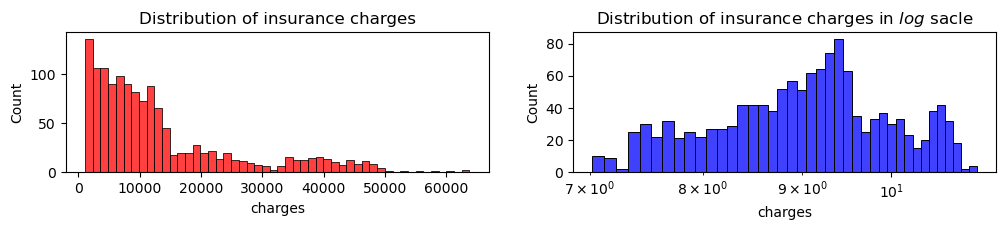

In [92]:
f= plt.figure(figsize=(12,4))

ax=f.add_subplot(221)
sns.histplot(dataframe['charges'],bins=50,color='r',ax=ax)
ax.set_title('Distribution of insurance charges')

ax=f.add_subplot(222)
sns.histplot(np.log(dataframe['charges']),bins=40,color='b',ax=ax)
ax.set_title('Distribution of insurance charges in $log$ sacle')
ax.set_xscale('log');

In [93]:
print(boxcox(dataframe['charges'], alpha=0.05)[0])

[12.12897974  8.80859638 10.14752106 ...  8.72968299  9.01913128
 12.9736611 ]


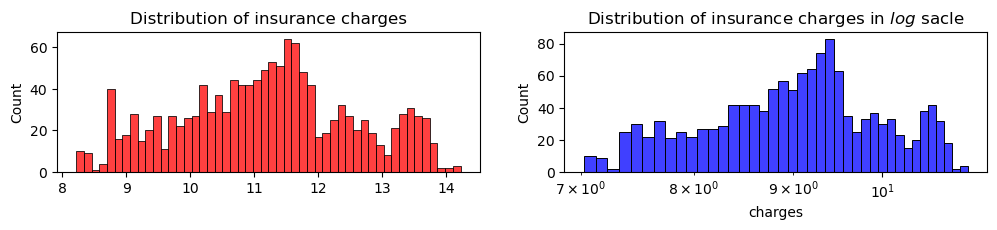

In [94]:
f= plt.figure(figsize=(12,4))

ax=f.add_subplot(221)
sns.histplot(boxcox(dataframe['charges'], alpha=0.05)[0],bins=50,color='r',ax=ax)
ax.set_title('Distribution of insurance charges')

ax=f.add_subplot(222)
sns.histplot(np.log(dataframe['charges']),bins=40,color='b',ax=ax)
ax.set_title('Distribution of insurance charges in $log$ sacle')
ax.set_xscale('log')

In [95]:
dataframe_with_dummies['charges'] = np.log(dataframe_with_dummies['charges'])

# Train test split

In [97]:
from sklearn.model_selection import train_test_split
X = dataframe_with_dummies.drop('charges',axis=1)
y = dataframe_with_dummies['charges']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [98]:
# Scikit Learn module
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train) # Note: x_0 =1 is no need to add, sklearn will take care of it.

print(lin_reg.intercept_)
print(lin_reg.coef_)

#Parameter
#sk_theta = [lin_reg.intercept_]+list(lin_reg.coef_)
#parameter_df = parameter_df.join(pd.Series(sk_theta, name='Sklearn_theta'))
#parameter_df

7.017546745136487
[ 0.03457031  0.01372137 -0.08031331  0.14635314  0.26342333  0.20875825
  0.55454747  0.41496986  1.55760555 -0.07108148 -0.16403118 -0.12716243]


In [99]:
# sklearn regression module
y_pred_sk = lin_reg.predict(X_test)

#Evaluvation: MSE
from sklearn.metrics import mean_squared_error
J_mse_sk = mean_squared_error(y_pred_sk, y_test)

# R_square
R_square_sk = lin_reg.score(X_test,y_test)
print('The Mean Square Error(MSE) or J(theta) is: ',J_mse_sk)
print('R square obtain for scikit learn library is :',R_square_sk)

The Mean Square Error(MSE) or J(theta) is:  0.1805122975889313
R square obtain for scikit learn library is : 0.7844372891704954


Text(0.5, 1.0, 'Check for Residual normality & mean: \n Residual eror')

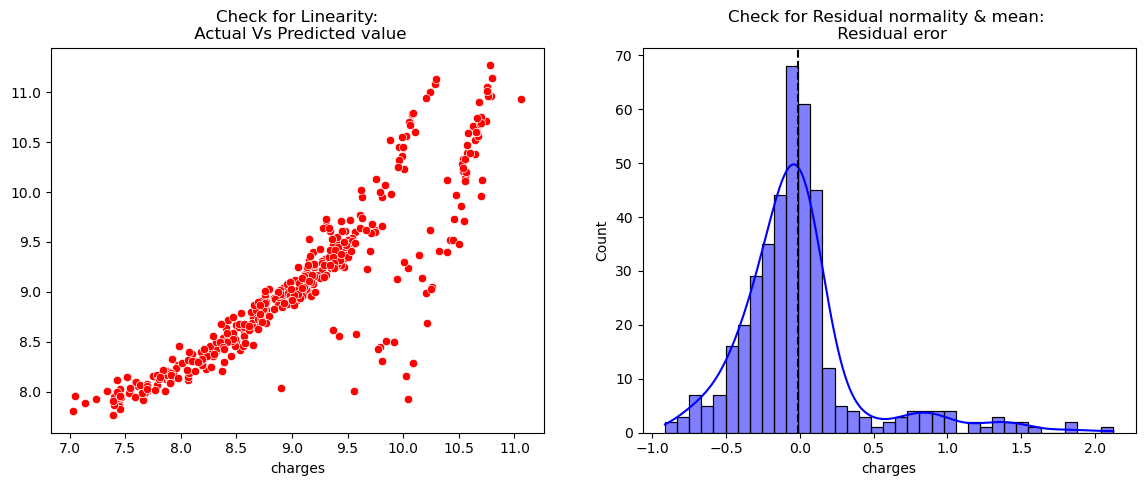

In [100]:
# Check for Linearity
f = plt.figure(figsize=(14,5))
ax = f.add_subplot(121)
sns.scatterplot(x=y_test,y=y_pred_sk,color='r')
ax.set_title('Check for Linearity:\n Actual Vs Predicted value')

# Check for Residual normality & mean
ax = f.add_subplot(122)
sns.histplot((y_test - y_pred_sk),ax=ax,color='b',kde=True)
ax.axvline((y_test - y_pred_sk).mean(),color='k',linestyle='--')
ax.set_title('Check for Residual normality & mean: \n Residual eror')

Text(0.5, 1.0, 'Check for Homoscedasticity: \nResidual Vs Predicted')

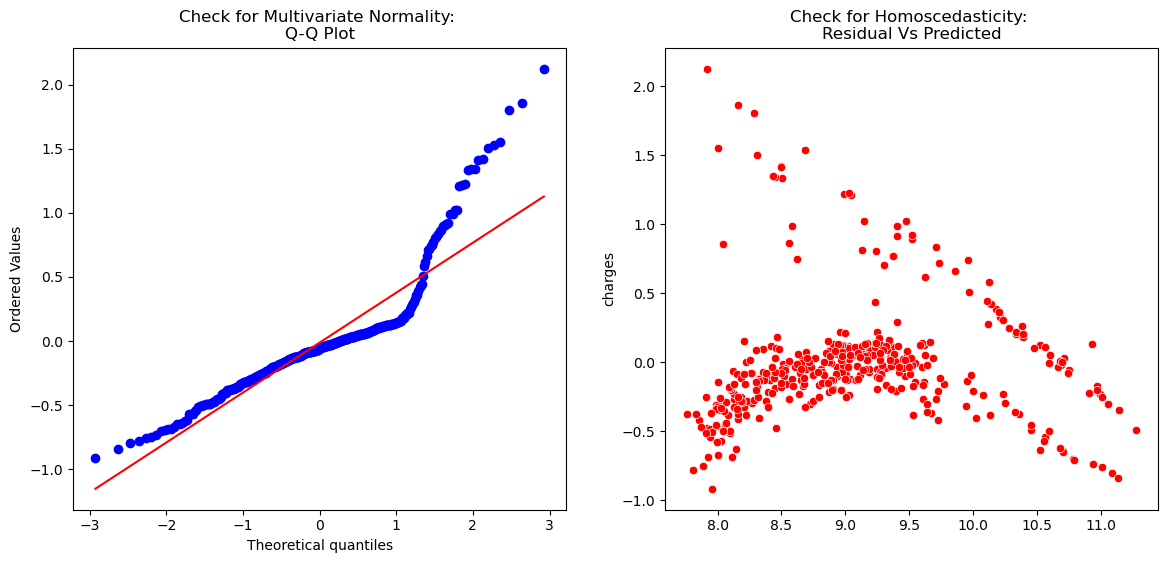

In [101]:
# Check for Multivariate Normality
# Quantile-Quantile plot 
f,ax = plt.subplots(1,2,figsize=(14,6))
import scipy as sp
_,(_,_,r)= sp.stats.probplot((y_test - y_pred_sk),fit=True,plot=ax[0])
ax[0].set_title('Check for Multivariate Normality: \nQ-Q Plot')

#Check for Homoscedasticity
sns.scatterplot(y = (y_test - y_pred_sk), x= y_pred_sk, ax = ax[1],color='r') 
ax[1].set_title('Check for Homoscedasticity: \nResidual Vs Predicted')

In [102]:
# Check for Multicollinearity
#Variance Inflation Factor
VIF = 1/(1- R_square_sk)
VIF

4.639021267416384

The model assumption linear regression as follows

1. In our model the actual vs predicted plot is curve so linear assumption fails  
2. The residual mean is zero and residual error plot right skewed  
3. Q-Q plot shows as value log value greater than 1.5 trends to increase  
4. The plot is exhibit heteroscedastic, error will insease after certian point.  
5. Variance inflation factor value is less than 5, so no multicollearity.  